In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Dongjak_Gu_Only.csv")

In [3]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [4]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A15605103,1159010100,1696,20010215.0,중앙난방,아파트,종합계약,34.0,374.0,1749.0
1,A15676701,1159010100,925,20010215.0,개별난방,아파트,단일계약,14.0,112.0,217.0
2,A15605002,1159010100,901,19971216.0,중앙난방,아파트,종합계약,21.0,327.0,591.0
3,A15605003,1159010100,299,20100826.0,개별난방,아파트,단일계약,10.0,0.0,333.0
4,A15603205,1159010100,824,19970912.0,중앙난방,아파트,단일계약,21.0,179.0,748.0
...,...,...,...,...,...,...,...,...,...,...
103,A10025504,1159010900,105,20050624.0,개별난방,아파트,NaN,4.0,50.0,100.0
104,A15601004,1159010900,108,NaN,NaN,아파트,NaN,NaN,NaN,NaN
105,A15601202,1159010900,272,19950218.0,개별난방,아파트,종합계약,14.0,181.0,114.0
106,A10024733,1159010900,135,20031024.0,개별난방,아파트,단일계약,4.0,27.0,108.0


In [5]:
df.isnull().sum()

kaptCode          0
bjdCode           0
Household_Num     0
Begin_Date        1
Heating_Method    1
House_Type        0
Elec_Con          5
Elev_Num          4
Park_Above        4
Park_Below        4
dtype: int64

<AxesSubplot: >

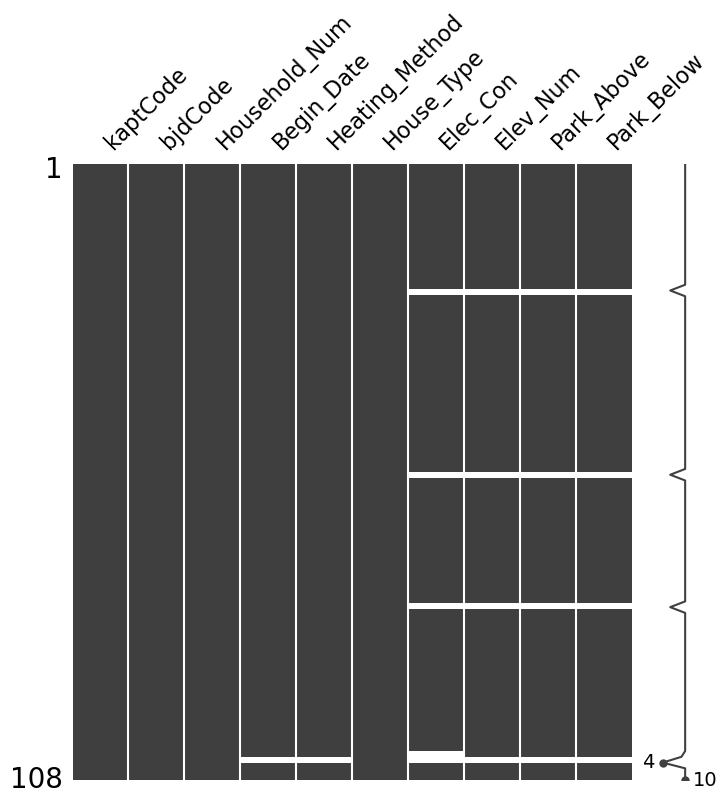

In [6]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [7]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 1 null values, and they are located at 
[104]


In [8]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0     2001-02-15
1     2001-02-15
2     1997-12-16
3     2010-08-26
4     1997-09-12
         ...    
102   1996-10-18
103   2005-06-24
105   1995-02-18
106   2003-10-24
107   2021-10-29
Name: Begin_Date, Length: 107, dtype: datetime64[ns]


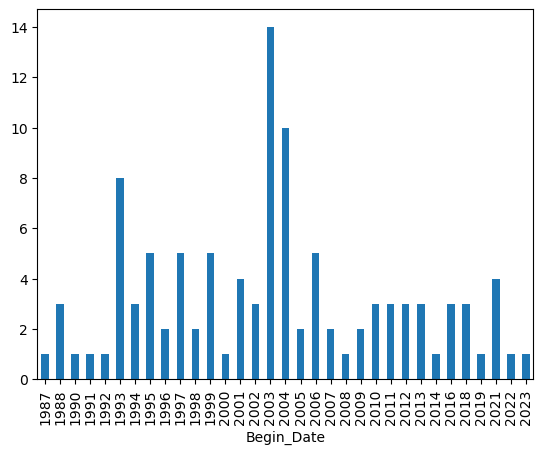

In [9]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

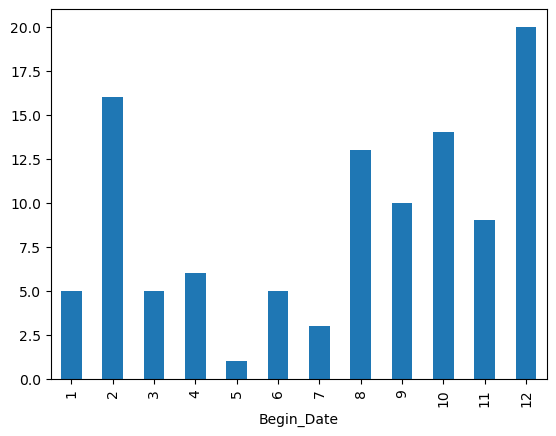

In [10]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [11]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0      1696
1       925
2       901
3       299
4       824
       ... 
103     105
104     108
105     272
106     135
107     959
Name: Household_Num, Length: 108, dtype: int64

In [12]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

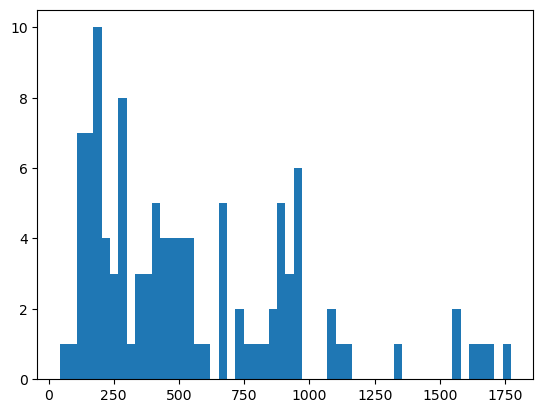

In [13]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [17]:
Household_Num.describe()

count     108.000000
mean      547.222222
std       402.961985
min        44.000000
25%       206.000000
50%       437.500000
75%       831.750000
max      1772.000000
Name: Household_Num, dtype: float64

In [25]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [19]:
printApt(Household_Num, df, dfInfo)

kaptCode           A10023350
bjdCode           1159010500
Household_Num           1772
Begin_Date        20230227.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num                72.0
Park_Above               0.0
Park_Below            2269.0
Name: 50, dtype: object
     kaptCode Complex_Name
56  A10023350         흑석자이


## Heating_Method

In [14]:
# null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 1 null values, and they are located at 
[104]


0      중앙난방
1      개별난방
2      중앙난방
3      개별난방
4      중앙난방
       ... 
103    개별난방
104     NaN
105    개별난방
106    개별난방
107    개별난방
Name: Heating_Method, Length: 108, dtype: object

In [15]:
Heating_Method = Heating_Method.dropna()

In [16]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 0 0 0 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Index(['중앙난방', '개별난방', '지역난방'], dtype='object')


In [17]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

1    91
0    14
2     2
dtype: int64

In [18]:
eng_ind_HM = ['Central', 'Individual', 'Regional']

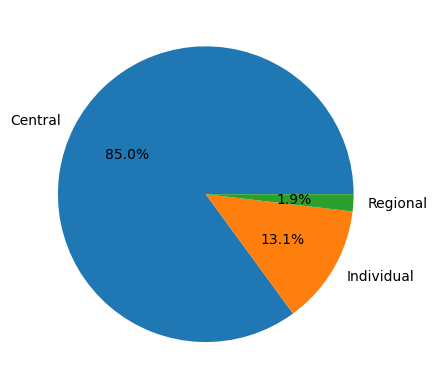

In [19]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [20]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 4 null values, and they are located at 
[ 22  54  77 104]


In [21]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

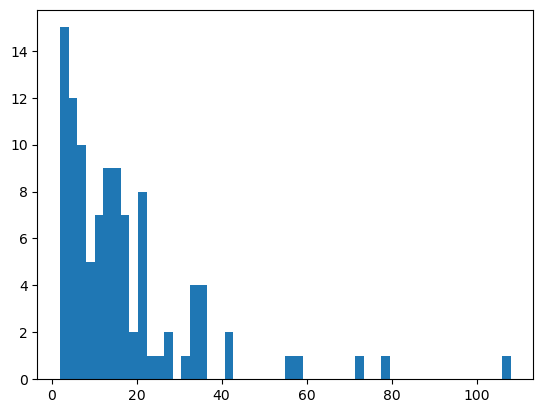

In [37]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [23]:
Elev_Num.describe()

count    104.000000
mean      17.096154
std       16.692839
min        2.000000
25%        6.000000
50%       13.000000
75%       21.000000
max      108.000000
Name: Elev_Num, dtype: float64

In [26]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A15681110
bjdCode           1159010800
Household_Num           1628
Begin_Date        19931120.0
Heating_Method          중앙난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num               108.0
Park_Above             923.0
Park_Below             937.0
Name: 87, dtype: object
     kaptCode Complex_Name
95  A15681110         대방대림


## Electricity Contract; Elec_Con

In [27]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 5 null values, and they are located at 
[ 22  54  77 103 104]


In [28]:
Elec_Con = Elec_Con.dropna()

In [29]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1
 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 0 0 0 1 1 1 0 2 1 1 2 0 1 1 0 2 2 1 1 1 1 0 1 1 0 1 1]
Index(['종합계약', '단일계약', '기타'], dtype='object')


In [30]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

1    64
0    35
2     4
dtype: int64

In [31]:
eng_ind_EC = ['Comprehensive', 'Single', 'Other']

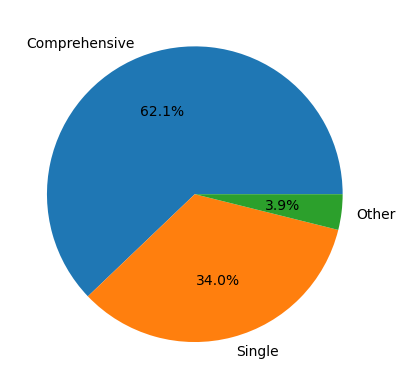

In [32]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [33]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 4 null values, and they are located at 
[ 22  54  77 104]
There are 4 null values, and they are located at 
[ 22  54  77 104]


In [34]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0      374
1      112
2      327
3        0
4      179
      ... 
102      0
103     50
105    181
106     27
107      0
Name: Park_Above, Length: 104, dtype: int16

0      1749
1       217
2       591
3       333
4       748
       ... 
102     237
103     100
105     114
106     108
107    1058
Name: Park_Below, Length: 104, dtype: int16

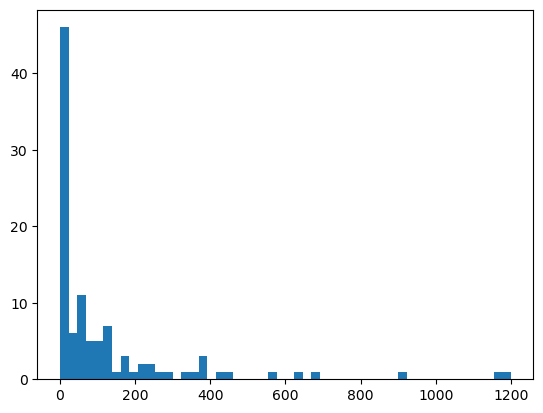

In [38]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

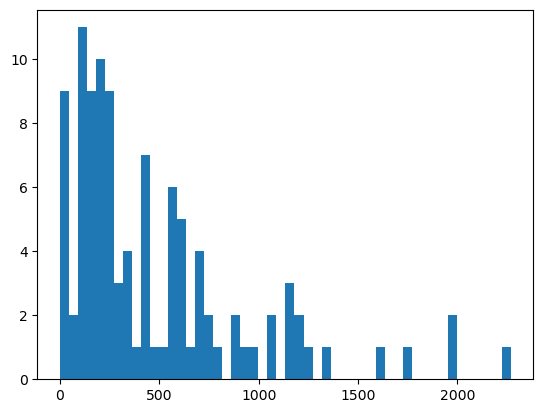

In [39]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = 50)
plt.show()

In [40]:
Park_Above.describe()

count     104.000000
mean      125.451923
std       219.778966
min         0.000000
25%         5.000000
50%        44.500000
75%       126.000000
max      1200.000000
Name: Park_Above, dtype: float64

In [41]:
Park_Below.describe()

count     104.000000
mean      478.596154
std       467.551887
min         0.000000
25%       158.750000
50%       296.500000
75%       637.500000
max      2269.000000
Name: Park_Below, dtype: float64

In [42]:
printApt(Park_Above, df, dfInfo)

kaptCode           A15609005
bjdCode           1159010700
Household_Num           1152
Begin_Date        19900807.0
Heating_Method          중앙난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                35.0
Park_Above            1200.0
Park_Below               0.0
Name: 67, dtype: object
     kaptCode Complex_Name
73  A15609005     사당 대림아파트


In [43]:
printApt(Park_Below, df, dfInfo)

kaptCode           A10023350
bjdCode           1159010500
Household_Num           1772
Begin_Date        20230227.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num                72.0
Park_Above               0.0
Park_Below            2269.0
Name: 50, dtype: object
     kaptCode Complex_Name
56  A10023350         흑석자이
